<a href="https://colab.research.google.com/github/JacquelineChew/us-covid-pred/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# Assignment 5

**DUE: Sunday March 14, 2021 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Jacqueline"
STUDENT_ID = "Chew"

In this assignment you will use Recurrrent Neural Network architecture (and possible variations of it) to solve **one** of the following problems. For the problem you choose, you will have to follow the steps mentioned below.


*   United States Corona Virus Cases Forecast
> In this dataset you will use the data available at https://drive.google.com/file/d/1Y7PDnv5-HfmchT9FmFsGKsM3U6JMEABF to predict the number of positive COVID-19 cases in the USA. Note that the number of COVID-19 cases are cumulative.

*   Reuters Topic Classification
> We will use the [Reuters newswire](https://keras.io/api/datasets/reuters/) classification dataset, which has text paired with 46 topics as labels. You can see what these labels represent [here](https://martin-thoma.com/nlp-reuters/). You will analyze the text and classify the text into one of the 46 classes. Classes are the defined based on the following list (in the same order):
>```
['cocoa','grain','veg-oil','earn','acq','wheat','copper',
'housing','money-supply','coffee','sugar','trade','reserves',
'ship','cotton','carcass','crude','nat-gas','cpi','money-fx',
'interest','gnp','meal-feed','alum','oilseed','gold','tin',
'strategic-metal','livestock','retail','ipi','iron-steel',
'rubber','heat','jobs','lei','bop','zinc','orange',
'pet-chem','dlr','gas','silver','wpi','hog','lead']
```





In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import reuters # Import Reuters dataset
import matplotlib.pyplot as plt
import string
import textwrap

## Part 1: Reading the data (20 points)
---

In this part you need to:

1) read in the data (for your task)
> * For COVID-19 data you might find this lihnk useful: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92. You need to use the public link to the dataset provided earlier so we can run your code on our end.
> * For Reuters data, you can simply load it from Keras: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/reuters/load_data

2) prepare and clean the data
> * For COVID-19 dataset this means removing attributes you don't need (ex. Lat/Long features),  removing entries that are not relevant to your prediction task (ex. number of cases of other countries), and any other pre-processing you might find useful.
Depending on your implementation you might find scaling also useful (Recall [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn. **Hint**: You will need to call .transpose inorder to comply with required inputshape (n,1)). You might also find it useful to trim the data in the begining as reporting was not accurate on early days (>50,000 cases might be a reasonable cut-off).
> * For Reuters news classification data, you may follow the RNN handout from the class exercise and prepare encoding and decoding functions and any other pre-processing you might find useful.

3) Sample of the dataset
> * For COVID-19 dataset print the head of your dataframe so we can see what data points and what features you will use for training.
> * For Reuters news classification data, print an example of a news along with its class label.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data

### YOUR CODE HERE ###
# Omit newswires longer than this many words
max_sequence_len = 200
# We do train_test_split later on so test_split is set as zero
(X, y), (_, _) = reuters.load_data(maxlen=max_sequence_len, test_split=0)

# Clean and pre-process the data

### YOUR CODE HERE ###
# Retrieves a dict mapping words to their index in the Reuters dataset.
word_dict = reuters.get_word_index()

for i in range(50):
  for key, value in word_dict.items():
    if value == i:
        print('(', key, ',', value, ')', sep = '', end = ',')

print(len(word_dict))

word_dict = {k:(v+3) for k,v in word_dict.items()}
word_dict["<PAD>"] = 0
word_dict["<START>"] = 1
word_dict["<UNK>"] = 2
word_dict["<UNUSED>"] = 3

vocab_size = len(word_dict.keys())
print('Number of words in vocabulary: ', vocab_size)

for i in range(50):
  for key, value in word_dict.items():
    if value == i:
        print('(', key, ',', value, ')', sep = '', end = ',')

# Needed to decode training data into readable text
inverse_word_dict = {value:key for key,value in word_dict.items()}

# Print sample data

### YOUR CODE HERE ###
print("\n")
for i in range(len(X)):
  X[i] = np.asarray(X[i])
# Print out the last newswire in the dataset
print(X[-1])
# Make sure that all newswires have the same size array
X = pad_sequences(X, maxlen=max_sequence_len)
print(X[-1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(the,1),(of,2),(to,3),(in,4),(said,5),(and,6),(a,7),(mln,8),(3,9),(for,10),(vs,11),(dlrs,12),(it,13),(reuter,14),(000,15),(1,16),(pct,17),(on,18),(from,19),(is,20),(that,21),(its,22),(cts,23),(by,24),(at,25),(year,26),(be,27),(with,28),(2,29),(will,30),(was,31),(billion,32),(he,33),(u,34),(s,35),(net,36),(has,37),(would,38),(an,39),(as,40),(5,41),(not,42),(loss,43),(4,44),(1986,45),(company,46),(which,47),(but,48),(this,49),30979
Number of words in vocabulary:  30983
(<PAD>,0),(<START>,1),(<UNK>,2),(<UNUSED>,3),(the,4),(of,5),(to,6),(in,7),(said,8),(and,9),(a,10),(mln,11),(3,12),(for,13),(vs,14),(dlrs,15),(it,16),(reuter,17),(000,18),(1,19),(pct,20),(on,21),(from,22),(is,23),(that,24),(its,25),(cts,26),(by,27),(at,28),(year,29),(be,30),(with,31),(2,32),(will,33),(was,34),(billion,35),(he,36),(u,37),(s,38),(net,39),(has,40),(would,41),(an,42),(as,43),(5,44),(not,45),(loss,46),(4,47),(1986,48),(company,49),

[    1  5586 15148    71     8    23   166   344    10    78    13    68
    80 

In [ ]:
# Functions are modeled after Lecture 18 class exercise
def encode_news(newswire, word_dict, maxlen):
  encoded_news = []
  for raw_word in newswire.split(' '):
    word = raw_word.strip().strip(string.punctuation).lower()
    if word is '' or word is '\n':
      continue
    try:
      encoded_news.append(word_dict[word])
    except KeyError as e:
      # raise KeyError(f'{e} not in word dictionary, newswire not encoded.')
      continue
  return pad_sequences(np.array(encoded_news).reshape(1,-1), maxlen=maxlen)

def decode_news(encoded_news, inverse_word_dict):
  sentence = []
  for encoded_word in encoded_news:
    if encoded_word == 0:
      continue
    sentence.append(inverse_word_dict[encoded_word])
  w = textwrap.TextWrapper(width=120,break_long_words=False,replace_whitespace=False)
  return '\n'.join(w.wrap(' '.join(sentence)))

In [ ]:
# Print an example of a news along with its class label
print(decode_news(X[-1], inverse_word_dict), end='\n\n')

print('Class: ', y[-1])

<START> inland vacuum inc said is board proposed a two for one stock split payable to shareholders of record april 30
the board also elected phillip frost chairman succeeding john durkin who remains president and chief executive officer
frost in early february bought 49 pct of the company durkin said stockholders at the annual meeting approved a measure
to change the company's name to ivaco industries inc five new directors were also elected to the company's board durkin
was re elected to the board the company said reuter 3

Class:  3


4) An additional step for COVID-19 data
>You need to modify your dataset so you determine how many days back the model will look to generate a new prediction. Begin with time_step=2. In the training phase you can choose different time-steps (and modify the architecture accordingly).

In [ ]:
# You may use the following function to process your dataset further.
# Generate a dataset where X[n] contains the readings for the 'time_step' previous days
# and y contains the reading for today.
# def create_dataset(dataset, time_steps=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-time_steps-1):
# 		a = dataset[i:(i+time_steps), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + time_steps, 0])
# 	return np.array(dataX), np.array(dataY)

In [ ]:
# Choose the number of time steps that the model "looks back"
# time_steps = 2
# dataX, dataY = create_dataset(X, time_steps=time_steps)
# dataX[:5], dataY[:5]

# Produce your dataset based on the number of days the model could look back

### YOUR CODE HERE ###


# Print head of the data

### YOUR CODE HERE ###

## Part 2: Data Partitioning (5 points)
---
Split data into train and test sets. Please use 80\% for training and 20\% for testing. Note:
> * for COVID-19 dataset you need to split the data in time (the begining 80\% of the days from start date will be the training data and the remaining 20\% will be test data).
> * for Reuters dataset, we want to have the same distribution of labels in the training and test set, so you can simply use stratified train-test split of Keras. See here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

# Stratify ensures that proportion of values in sample will be the same as
# the proportion of values provided to the parameter (ex. y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

For COVID-19 dataset, you need to reshape the partitions for the model to be able to process them.

In [ ]:
# Reshape input to be [samples, time steps, features]. For example:
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

## Part 3: Simple RNN Model (25 points)
---

In this part you will create a model using an RNN layer (LSTM or GRU, unidirectional or bidirectional) and train it on your training data. You will also plot training and validation loss and your metric (accuracies (for Reuters data) and mean squared error (for COVID-19 data)).

Compile your model and display the summary:

In [ ]:
# Build your model

### YOUR CODE HERE ###
from tensorflow.keras.layers import Embedding, Dense, Dropout, Input, LSTM
from tensorflow.keras.models import Model

input_layer = Input(shape=(max_sequence_len))
x = Embedding(vocab_size, 256, mask_zero=True)(input_layer)

x = LSTM(256)(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(46, activation='softmax')(x)
reuters_model = Model(input_layer, x)


loss = tf.keras.losses.SparseCategoricalCrossentropy()

opt = tf.keras.optimizers.Adam(2e-4)

metrics = ['accuracy']

reuters_model.compile(loss=loss,
              optimizer=opt,
              metrics=metrics)

reuters_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 256)          7931648   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                1518      
Total params: 8,477,006
Trainable params: 8,477,006
Non-trainable params: 0
___________________________________________________

In [ ]:
batchsize = 1024
epochs =  100

with tf.device('/device:GPU:0'):
  # Fit model
  history = reuters_model.fit(X_train, y_train, batch_size=batchsize, epochs=epochs, validation_split=0.2, shuffle=True)

Epoch 1/100
6/6 [==============================] - 9s 915ms/step - loss: 3.8285 - accuracy: 0.0217 - val_loss: 3.8236 - val_accuracy: 0.1278
Epoch 2/100
6/6 [==============================] - 4s 637ms/step - loss: 3.8214 - accuracy: 0.1636 - val_loss: 3.8133 - val_accuracy: 0.1709
Epoch 3/100
6/6 [==============================] - 4s 645ms/step - loss: 3.8094 - accuracy: 0.2033 - val_loss: 3.7950 - val_accuracy: 0.2429
Epoch 4/100
6/6 [==============================] - 4s 652ms/step - loss: 3.7870 - accuracy: 0.2751 - val_loss: 3.7527 - val_accuracy: 0.3347
Epoch 5/100
6/6 [==============================] - 4s 673ms/step - loss: 3.7219 - accuracy: 0.3832 - val_loss: 3.5647 - val_accuracy: 0.4089
Epoch 6/100
6/6 [==============================] - 4s 639ms/step - loss: 3.5292 - accuracy: 0.4114 - val_loss: 3.3777 - val_accuracy: 0.2366
Epoch 7/100
6/6 [==============================] - 4s 637ms/step - loss: 3.3176 - accuracy: 0.3359 - val_loss: 3.0797 - val_accuracy: 0.4004
Epoch 8/100
6

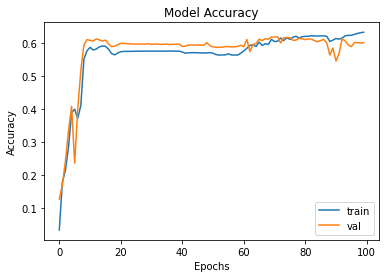

In [ ]:
# Plot the Model loss

### YOUR CODE HERE ###
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

## Part 4: More Advanced RNN Model (30 points)
---
In this part you will create an RNN model with the number of layers and architerure you prefer. Train it on your training data. You will also plot training and validation loss and your metric (accuracies (for Reuters data) and mean squared error (for COVID-19 data)). In this part, you can try different models and use different hyper-parameters and report only the best one.

Compile your model and display the summary:

In [ ]:
# Build your model

### YOUR CODE HERE ###
import tensorflow as tf
input_layer = Input(shape=(max_sequence_len))
x = Embedding(vocab_size, 256, mask_zero=True)(input_layer)

x = LSTM(256)(x)
x = Dense(64, activation='relu')(x)
# x = Dropout(0.4)(x)
# x = Dense(32, activation='relu')(x)
# x = Dropout(0.8)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(46, activation='softmax')(x)  # 46 classes
model = Model(input_layer, x)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

opt = tf.keras.optimizers.Adam(0.0003)

metrics = ['accuracy']

model.compile(loss=loss,
              optimizer=opt,
              metrics=metrics)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 200, 256)          7931648   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 46)                2990      
Total params: 8,476,398
Trainable params: 8,476,398
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
batchsize = 1024
epochs =  100

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

with tf.device('/device:GPU:0'):
  # Fit model
  history = model.fit(X_train,
                      y_train,
                      batch_size=batchsize,
                      epochs=epochs,
                      validation_split=0.2,
                      shuffle=True,
                      callbacks=[es])

Epoch 1/100
6/6 [==============================] - 9s 863ms/step - loss: 3.8188 - accuracy: 0.1445 - val_loss: 3.7818 - val_accuracy: 0.2733
Epoch 2/100
6/6 [==============================] - 4s 656ms/step - loss: 3.7664 - accuracy: 0.2572 - val_loss: 3.6791 - val_accuracy: 0.2874
Epoch 3/100
6/6 [==============================] - 4s 662ms/step - loss: 3.5899 - accuracy: 0.2422 - val_loss: 2.8554 - val_accuracy: 0.2472
Epoch 4/100
6/6 [==============================] - 4s 656ms/step - loss: 2.8203 - accuracy: 0.2599 - val_loss: 2.5457 - val_accuracy: 0.4103
Epoch 5/100
6/6 [==============================] - 4s 670ms/step - loss: 2.6020 - accuracy: 0.4180 - val_loss: 2.4134 - val_accuracy: 0.4103
Epoch 6/100
6/6 [==============================] - 4s 652ms/step - loss: 2.4397 - accuracy: 0.4204 - val_loss: 2.3468 - val_accuracy: 0.4103
Epoch 7/100
6/6 [==============================] - 4s 672ms/step - loss: 2.4058 - accuracy: 0.4085 - val_loss: 2.3059 - val_accuracy: 0.4103
Epoch 8/100
6

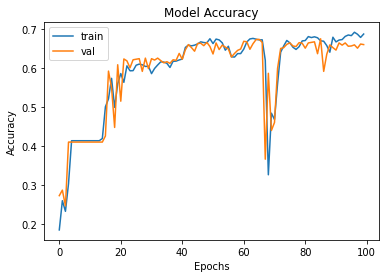

In [ ]:
# Plot the Model loss

### YOUR CODE HERE ###
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Changes from Part 3:
- Added Early Stopping with a patience limit (how long before the training stops) of 50
- Removed second Dense layer
- Changed learning rate to 0.0003

## Part 5: Looking at the Predictions (20 points)
---

Now, Using the final (best) model you trained, show your model's performance on the test set.
> * For COVID-19 dataset, plot the model's prediction for the number of cases and the actual daily cumulative case numbers.
> * For Reuters dataset, calculate and display the prediction accuracy for all of the 46 different classes.

In [ ]:
### YOUR CODE HERE ###
from sklearn.metrics import confusion_matrix

y_preds_raw = model.predict(X_test)
y_preds_raw = tf.convert_to_tensor(y_preds_raw)
softmax = tf.keras.activations.softmax(y_preds_raw)
y_preds = tf.math.argmax(softmax, axis=1).numpy()

# print(y_preds)

# print(f'Test Accuracy {np.mean(y_preds==y_test)}')
# class_accuracies = {k:y_preds[k] for k in range(46)}
# for i in range(46):
#   print(f'Class {i}: {class_accuracies[i]}')

cf_mat = confusion_matrix(y_test, y_preds)
# print(cf_mat)
# Normalize diagonal entries (accuracies of each class)
cf_mat = cf_mat.astype('float') / cf_mat.sum(axis=1)[:, np.newaxis]
# print(cf_mat)
cf_mat.diagonal()


array([0.        , 0.62337662, 0.        , 0.9247606 , 0.90049751,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.50793651, 0.        , 0.        , 0.12765957,
       0.        , 0.        , 0.        , 0.        , 0.41666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])